In [1]:
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [2]:
dataset = pd.read_csv("Hasil TES SBK LPDP Gelombang 1 - 2021.csv")
dataset

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,10,12,6,Universitas Indonesia
1,Reguler,S2,Luar Negeri,ENE,"Ya, dengan Loa",Ya,17,22,8,UCL
2,Targeted,S2,Luar Negeri,ELE,"Ya, dengan Loa",Ya,16,18,7,KTH Sweden
3,Reguler,S2,Dalam negeri,LIN,Tidak,Tidak,15,12,4,UGM
4,Afirmasi,S2,Luar Negeri,LIN,Tidak,Ya,16,9,7,University of Birmingham
...,...,...,...,...,...,...,...,...,...,...
426,Reguler,S2,Dalam negeri,718,Tidak,Tidak,23,25,12,UGM
427,Reguler,S2,Dalam negeri,TRP,Tidak,Tidak,14,14,6,UI
428,Targeted,S2,Luar Negeri,ENT,Tidak,Tidak,15,7,9,Imperial College London
429,Targeted,S2,Dalam negeri,TRP,Tidak,Ya,17,11,6,NaN


Data yang digunakan dalam pemrosesan data harus lah numeric. Maka, saya akan mengubah semua variabel tipe object menjadi numeric.

##### encode categorical data

In [3]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
dataset['Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?']= label_encoder.fit_transform(dataset['Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?'])
dataset['Jenis Beasiswa'] = label_encoder.fit_transform(dataset['Jenis Beasiswa'])
dataset['Tingkat Pendidikan yang Dituju'] = label_encoder.fit_transform(dataset['Tingkat Pendidikan yang Dituju'])
dataset['Negara Tujuan Kuliah'] = label_encoder.fit_transform(dataset['Negara Tujuan Kuliah'])
dataset['Bidang Studi yang dipilih saat mendaftar'] = label_encoder.fit_transform(dataset['Bidang Studi yang dipilih saat mendaftar'])
dataset['Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP'] = label_encoder.fit_transform(dataset['Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP'])
dataset['[optional] Kampus/universitas tujuan saat ini (pilihan 1)'] = label_encoder.fit_transform(dataset['[optional] Kampus/universitas tujuan saat ini (pilihan 1)'])
dataset

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,2,0,0,79,0,1,10,12,6,105
1,1,0,1,34,1,1,17,22,8,76
2,2,0,1,33,1,1,16,18,7,31
3,1,0,0,52,0,0,15,12,4,77
4,0,0,1,52,0,1,16,9,7,120
...,...,...,...,...,...,...,...,...,...,...
426,1,0,0,2,0,0,23,25,12,77
427,1,0,0,79,0,0,14,14,6,79
428,2,0,1,36,0,0,15,7,9,23
429,2,0,0,79,0,1,17,11,6,165


##### Feature Selection using Pearson

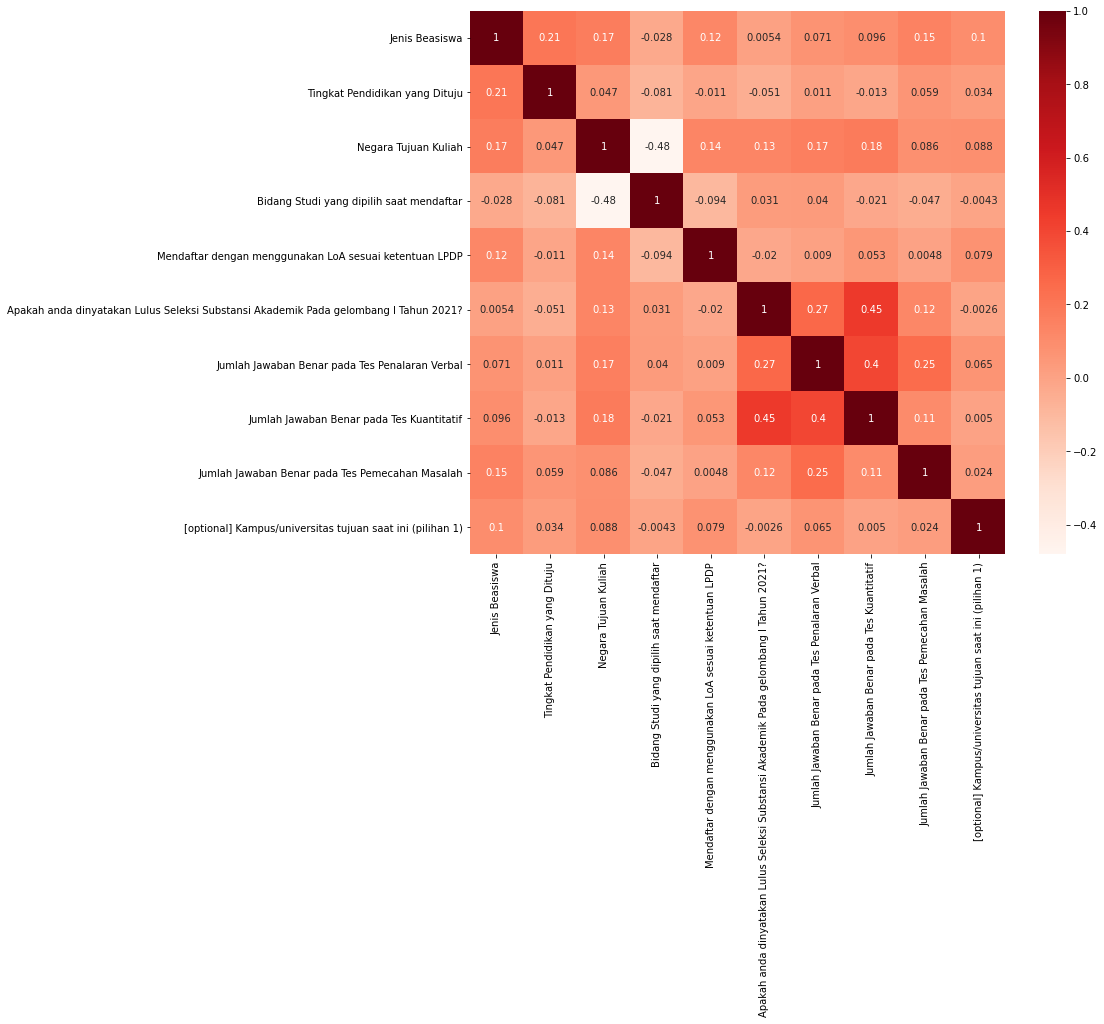

In [4]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
#Correlation with output variable
cor_target = abs(cor["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0]
relevant_features.sort_values(ascending=False)

Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?    1.000000
Jumlah Jawaban Benar pada Tes Kuantitatif                                               0.451785
Jumlah Jawaban Benar pada Tes Penalaran Verbal                                          0.266881
Negara Tujuan Kuliah                                                                    0.133492
Jumlah Jawaban Benar pada Tes Pemecahan Masalah                                         0.120993
Tingkat Pendidikan yang Dituju                                                          0.050976
Bidang Studi yang dipilih saat mendaftar                                                0.031341
Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP                                  0.019664
Jenis Beasiswa                                                                          0.005410
[optional] Kampus/universitas tujuan saat ini (pilihan 1)                               0.002552
Name: Apakah anda dinyatakan L

saya akan menghapus 1 variabel yang memiliki korelasi terendah. Hal ini dilakukan untuk meningkatkan akurasi saat melakukan prediksi.
Berdasarkan metode seleksi fitur pearson
1 variabel yang memiliki korelasi terendah yaitu :

"[optional] Kampus/universitas tujuan saat ini (pilihan 1)"



In [6]:
dataset.head() 

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah,[optional] Kampus/universitas tujuan saat ini (pilihan 1)
0,2,0,0,79,0,1,10,12,6,105
1,1,0,1,34,1,1,17,22,8,76
2,2,0,1,33,1,1,16,18,7,31
3,1,0,0,52,0,0,15,12,4,77
4,0,0,1,52,0,1,16,9,7,120


In [7]:
data_frame = dataset.drop(dataset.columns[[9]], axis=1)
data_frame.head()

,Jenis Beasiswa,Tingkat Pendidikan yang Dituju,Negara Tujuan Kuliah,Bidang Studi yang dipilih saat mendaftar,Mendaftar dengan menggunakan LoA sesuai ketentuan LPDP,Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?,Jumlah Jawaban Benar pada Tes Penalaran Verbal,Jumlah Jawaban Benar pada Tes Kuantitatif,Jumlah Jawaban Benar pada Tes Pemecahan Masalah
0,2,0,0,79,0,1,10,12,6
1,1,0,1,34,1,1,17,22,8
2,2,0,1,33,1,1,16,18,7
3,1,0,0,52,0,0,15,12,4
4,0,0,1,52,0,1,16,9,7


In [8]:
X = data_frame.drop(labels=["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"],axis=1) # Features
y = data_frame["Apakah anda dinyatakan Lulus Seleksi Substansi Akademik Pada gelombang I Tahun 2021?"] # Target

##### IQR Robust Scaler Transform

In [9]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
trans = RobustScaler()

#### KMeans Model

In [10]:
model = KMeans()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.141 (0.074)
